In [1]:
import os
import random
from pathlib import Path
from tqdm.auto import tqdm
import numpy as np
import pyvista as pv
from matplotlib import pyplot as plt
from PIL import Image

In [2]:
data_dir = Path("/home/max/Desktop/python_projects/SimJeb")
meshes_dir = data_dir / "SimJEB_surfmesh"
dest = data_dir / "SimJEB_sdf"
metadata_dir = data_dir / "SimJEB_metadata"

In [3]:
paths = []
for path in meshes_dir.glob("*.obj"):
    paths.append(path)

In [4]:
interfaces = pv.read(metadata_dir / "interfaces.stl")

In [9]:
bodies = []
for b in interfaces.split_bodies():
    center = np.mean(b.points, axis=0)
    b.points -= center
    b.points *= 0.95
    b.points += center
    bodies.append(b.extract_surface())
interfaces_smaller = bodies[0].merge(bodies[1:])

In [13]:
outliers = []
for path in tqdm(paths):
    mesh = pv.read(path)
    clipped = mesh.clip_surface(interfaces_smaller, True)
    if not len(clipped.points) == 0:
        outliers.append(path.stem)

  0%|          | 0/381 [00:00<?, ?it/s]

In [14]:
len(outliers)

148

In [17]:
with open(metadata_dir / "outliers_interfaces.txt", "w") as f:
    f.writelines("\n".join(outliers))

In [18]:
outliers_set = set(outliers)

In [19]:
paths_clean = [p for p in paths if p.stem not in outliers_set]

In [20]:
len(paths_clean)

233

  0%|          | 0/932 [00:00<?, ?it/s]

/home/max/miniconda3/envs/dev/lib/python3.10/site-packages/pyvista/jupyter/notebook.py:34: UserWarning: Failed to use notebook backend: 

No module named 'trame'

Falling back to a static output.
  warnings.warn(


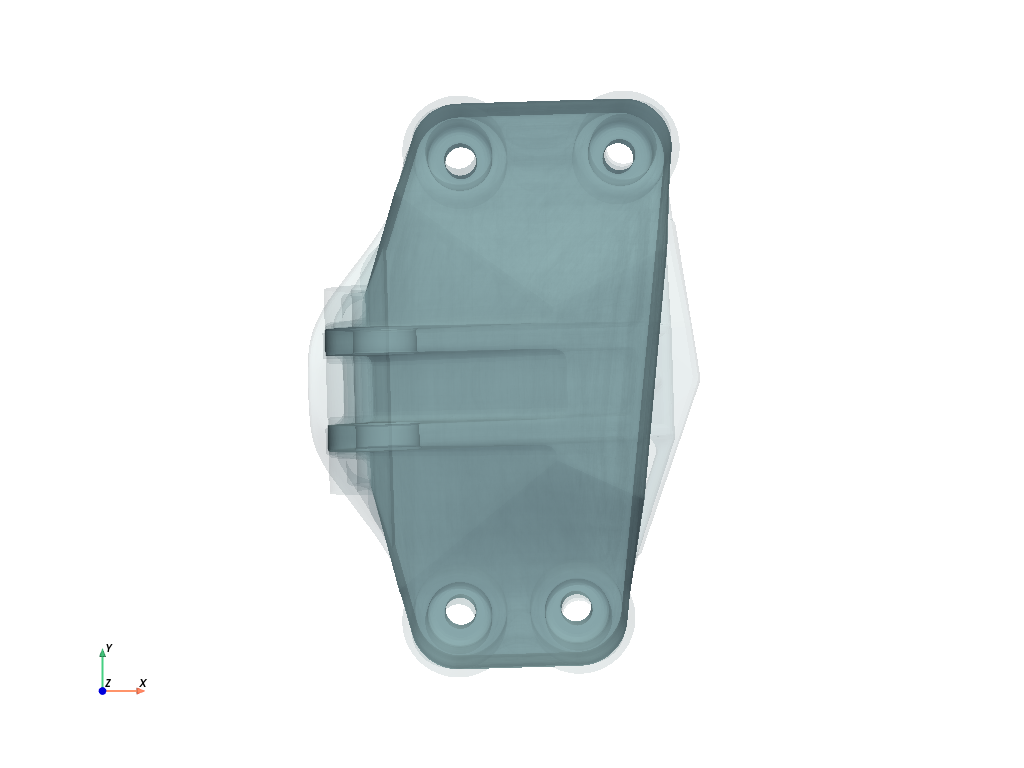

/home/max/miniconda3/envs/dev/lib/python3.10/site-packages/pyvista/jupyter/notebook.py:34: UserWarning: Failed to use notebook backend: 

No module named 'trame'

Falling back to a static output.
  warnings.warn(


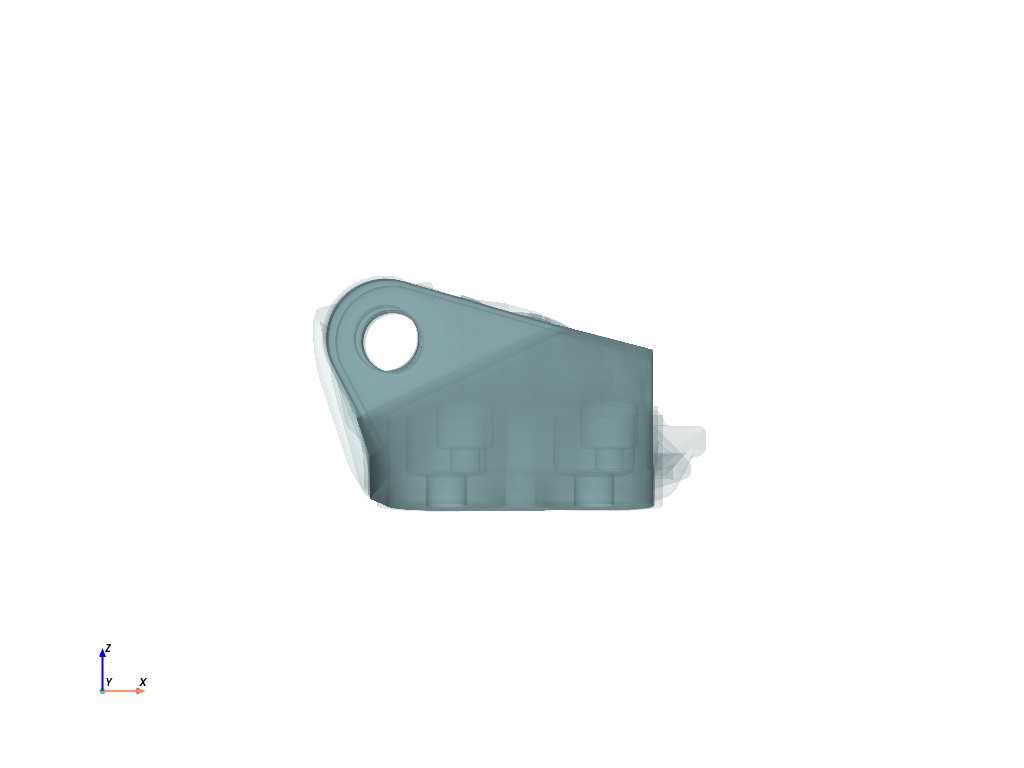

/home/max/miniconda3/envs/dev/lib/python3.10/site-packages/pyvista/jupyter/notebook.py:34: UserWarning: Failed to use notebook backend: 

No module named 'trame'

Falling back to a static output.
  warnings.warn(


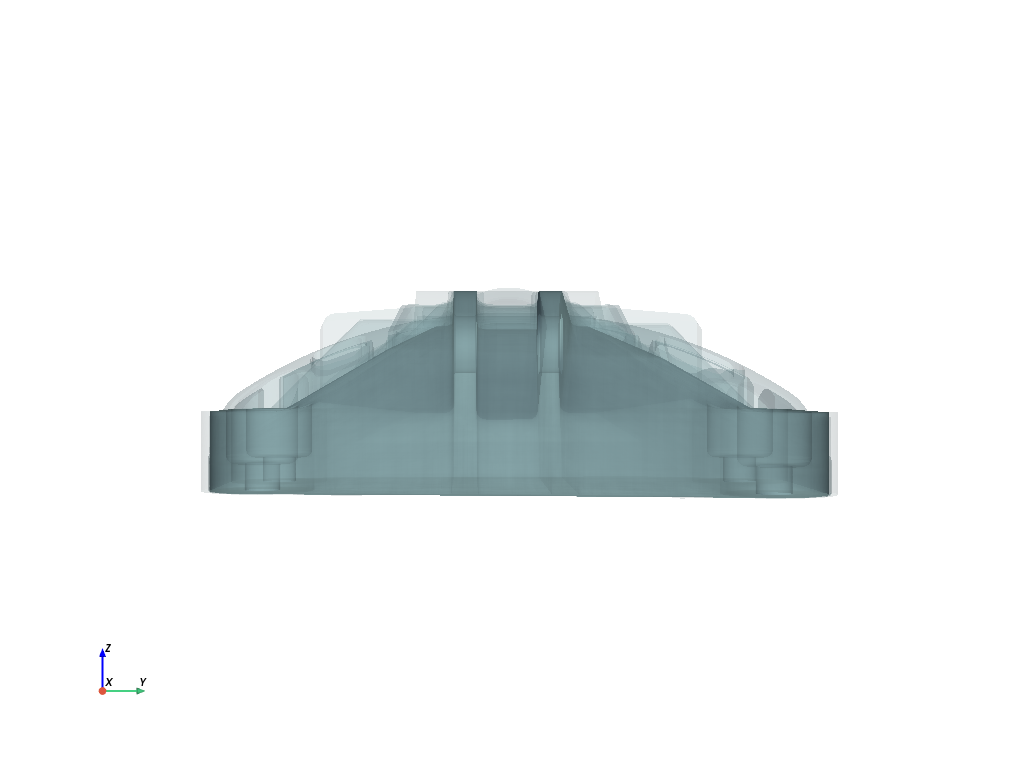

/home/max/miniconda3/envs/dev/lib/python3.10/site-packages/pyvista/jupyter/notebook.py:34: UserWarning: Failed to use notebook backend: 

No module named 'trame'

Falling back to a static output.
  warnings.warn(


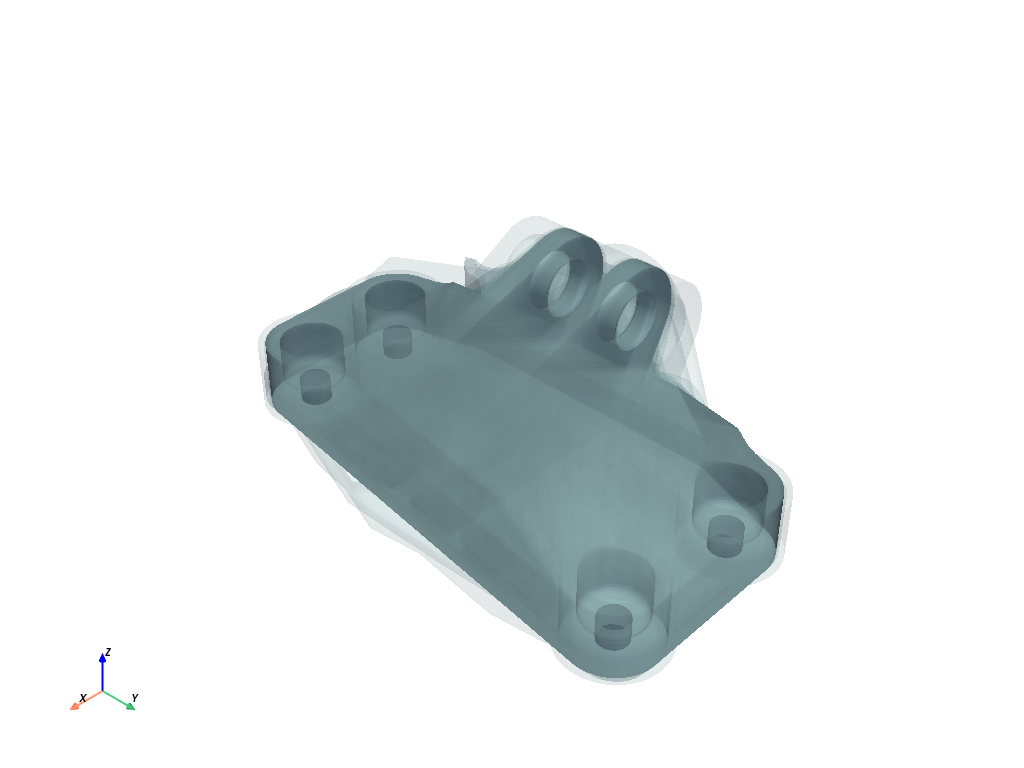

In [22]:
views = ["xy", "xz", "yz", "iso"]
paths_clean = [p for p in paths if p.stem not in outliers_set]
with tqdm(total=len(paths_clean)*len(views)) as pbar:
    plotters = {v: pv.Plotter() for v in views}

    for path in paths_clean:
        mesh = pv.read(path)
        for view in views:
            pl = plotters[view]
            pl.add_mesh(mesh, opacity=0.1)
            pbar.update(1)

    for view in views:
        pl = plotters[view]
        pl.camera_position = view
        pl.add_axes()
        pl.show_axes_all()
        pl.show(auto_close=False)
        _ = pl.add_text(
            f"{view}",
            position='upper_right',
            color='black',
            shadow=True,
            font_size=26,
        )
        image = pl.screenshot(None, return_img=True)
        Image.fromarray(pl.screenshot(None, return_img=True)).save(
            metadata_dir / f"{view}_clean.jpeg"
        )

In [32]:
dataset = [p.stem for p in paths if p.stem not in outliers_set]

In [33]:
len(dataset)

233

In [34]:
random.shuffle(dataset)

In [35]:
split = 0.85
split_int = int(len(dataset) * split)

In [36]:
train = dataset[:split_int]
test = dataset[split_int:]

In [37]:
with open(metadata_dir / "train_interfaces.txt", "w") as f:
    f.writelines("\n".join(train))

In [38]:
with open(metadata_dir / "test_interfaces.txt", "w") as f:
    f.writelines("\n".join(test))

In [39]:
len(train)

198

In [40]:
len(test)

35